In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
images = digits.images
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

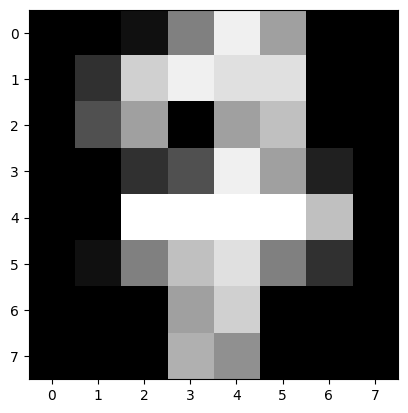

7


In [ ]:
index = 17
plt.imshow(images[index] , cmap = 'gray')
plt.show()
print(digits.target[index])

In [ ]:
x = digits.data
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
y = keras.utils.to_categorical(y , num_classes = 10)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
x .shape

(1797, 64)

In [ ]:
y.shape

(1797, 10)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

# Neural network

In [ ]:
from keras.layers import Input , Dense , Dropout

In [ ]:
model = keras.models.Sequential()
model.add(Input(shape = (x.shape[1] , )))
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 16 , activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 10 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,002 (230.48 KB)

 Trainable params: 59,002 (230.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
            optimizer = tf.optimizers.Adam() ,
            loss = tf.losses.CategoricalCrossentropy() ,
            metrics = [tf.metrics.CategoricalAccuracy])

In [ ]:
model.fit(x_train , y_train , epochs = 100 , batch_size = 32 , verbose = 2)

Epoch 1/100
45/45 - 8s - 185ms/step - categorical_accuracy: 0.1747 - loss: 2.5634
Epoch 2/100
45/45 - 0s - 3ms/step - categorical_accuracy: 0.3166 - loss: 1.8693
Epoch 3/100
45/45 - 0s - 3ms/step - categorical_accuracy: 0.5052 - loss: 1.4121
Epoch 4/100
45/45 - 0s - 3ms/step - categorical_accuracy: 0.6611 - loss: 1.0172
Epoch 5/100
45/45 - 0s - 3ms/step - categorical_accuracy: 0.7411 - loss: 0.7610
Epoch 6/100
45/45 - 0s - 6ms/step - categorical_accuracy: 0.7829 - loss: 0.6184
Epoch 7/100
45/45 - 0s - 8ms/step - categorical_accuracy: 0.8448 - loss: 0.4831
Epoch 8/100
45/45 - 0s - 7ms/step - categorical_accuracy: 0.8720 - loss: 0.3976
Epoch 9/100
45/45 - 0s - 6ms/step - categorical_accuracy: 0.8942 - loss: 0.3353
Epoch 10/100
45/45 - 0s - 7ms/step - categorical_accuracy: 0.8956 - loss: 0.3242
Epoch 11/100
45/45 - 0s - 7ms/step - categorical_accuracy: 0.9088 - loss: 0.2922
Epoch 12/100
45/45 - 0s - 7ms/step - categorical_accuracy: 0.9144 - loss: 0.2702
Epoch 13/100
45/45 - 0s - 5ms/step 

In [ ]:
loss , acc = model.evaluate(x_test , y_test)
loss , acc

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - categorical_accuracy: 0.9805 - loss: 0.0805


(0.09884391725063324, 0.9777777791023254)

In [ ]:
y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
y_pred = tf.argmax(y_pred , axis = 1)
y_pred

<tf.Tensor: shape=(360,), dtype=int64, numpy=
array([8, 3, 3, 6, 0, 4, 7, 5, 3, 9, 6, 3, 8, 0, 0, 5, 2, 2, 3, 6, 4, 3,
       5, 7, 1, 4, 8, 1, 6, 6, 1, 3, 3, 0, 5, 4, 4, 6, 5, 1, 0, 2, 7, 0,
       5, 3, 5, 0, 3, 1, 0, 9, 6, 9, 4, 4, 4, 5, 5, 2, 7, 2, 9, 6, 9, 9,
       9, 6, 8, 1, 3, 1, 5, 2, 7, 4, 3, 7, 3, 5, 4, 1, 8, 8, 7, 1, 4, 9,
       3, 5, 3, 1, 7, 4, 7, 4, 0, 0, 6, 6, 2, 2, 5, 6, 1, 1, 0, 7, 6, 0,
       0, 5, 2, 7, 6, 3, 8, 2, 6, 7, 1, 7, 3, 5, 3, 6, 1, 1, 1, 0, 1, 0,
       1, 7, 2, 6, 8, 0, 5, 5, 5, 7, 7, 9, 4, 7, 8, 9, 3, 0, 0, 2, 4, 4,
       5, 0, 2, 1, 8, 9, 1, 2, 6, 5, 9, 5, 9, 5, 2, 0, 4, 6, 9, 7, 3, 4,
       1, 1, 5, 1, 1, 0, 5, 0, 5, 3, 0, 3, 7, 5, 8, 3, 6, 1, 3, 2, 8, 8,
       0, 8, 5, 5, 5, 6, 8, 7, 8, 8, 3, 0, 2, 6, 7, 2, 1, 8, 5, 2, 6, 3,
       6, 0, 2, 6, 2, 4, 8, 7, 5, 5, 6, 6, 5, 3, 0, 4, 7, 9, 0, 6, 8, 6,
       7, 9, 1, 8, 4, 6, 6, 3, 3, 0, 4, 4, 3, 8, 1, 7, 3, 1, 7, 4, 4, 5,
       3, 3, 4, 6, 0, 8, 9, 4, 0, 2, 7, 8, 1, 4, 3, 4, 3, 9, 9, 3, 3, 8,
     

In [ ]:
y_test = tf.argmax(y_test , axis = 1)
y_test

<tf.Tensor: shape=(360,), dtype=int64, numpy=
array([8, 3, 3, 6, 0, 4, 7, 5, 3, 9, 6, 3, 8, 0, 0, 5, 2, 2, 3, 6, 4, 3,
       5, 7, 1, 4, 8, 1, 6, 6, 1, 3, 3, 0, 5, 4, 4, 6, 5, 1, 0, 2, 7, 0,
       5, 3, 5, 0, 3, 1, 0, 9, 6, 4, 4, 4, 4, 5, 5, 2, 7, 2, 9, 6, 9, 9,
       9, 6, 8, 1, 3, 1, 5, 2, 7, 4, 3, 7, 3, 5, 4, 1, 8, 8, 7, 8, 4, 9,
       3, 5, 3, 1, 7, 4, 7, 4, 0, 0, 6, 6, 2, 8, 5, 6, 1, 1, 0, 7, 6, 0,
       0, 5, 2, 7, 6, 3, 8, 2, 6, 7, 1, 7, 3, 5, 3, 6, 1, 1, 1, 0, 1, 0,
       1, 7, 2, 6, 8, 0, 5, 5, 5, 7, 7, 9, 4, 7, 8, 9, 3, 0, 0, 2, 4, 4,
       5, 0, 2, 1, 8, 9, 1, 2, 6, 5, 9, 5, 9, 5, 2, 0, 4, 6, 9, 7, 3, 4,
       1, 1, 5, 1, 1, 0, 5, 0, 5, 3, 0, 3, 7, 5, 8, 3, 6, 1, 3, 2, 8, 8,
       0, 8, 5, 9, 5, 6, 8, 7, 8, 3, 3, 0, 2, 6, 7, 2, 1, 8, 5, 2, 6, 3,
       6, 0, 2, 6, 2, 4, 8, 7, 5, 5, 6, 6, 5, 3, 0, 4, 7, 9, 0, 6, 8, 6,
       7, 9, 8, 8, 4, 6, 6, 3, 3, 0, 4, 4, 3, 8, 1, 7, 3, 1, 7, 4, 4, 5,
       3, 3, 4, 6, 0, 8, 9, 4, 0, 2, 7, 8, 1, 4, 3, 4, 3, 9, 9, 3, 3, 8,
     

In [ ]:
y_pred = y_pred.numpy()
y_test = y_test.numpy()

In [ ]:
(y_pred != y_test).sum() / len(y_test)

np.float64(0.022222222222222223)

# Manual test

In [ ]:
import random

In [ ]:
test_index = random.randint(0 , len(y_test) - 1)
test_index

156

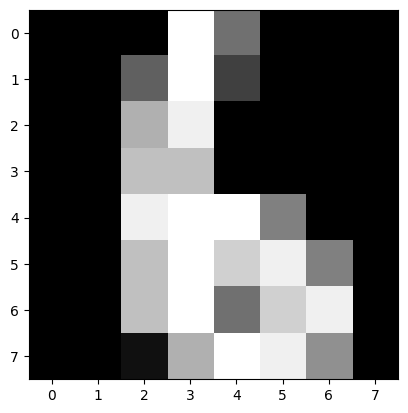

6


In [ ]:
plt.imshow(images[test_index] , cmap = 'gray')
plt.show()
print(digits.target[test_index])

In [ ]:
y_pred = model.predict(x[test_index].reshape(1 , -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
y[test_index].argmax()

np.int64(6)

In [ ]:
y_pred.argmax()

np.int64(6)